# YOLOv3 Implementation for Ingredients Detection
Bangkit Final Project Group BDG2-C<br>
Improvement: Ingredients Detection using YOLOv3<br>
Paper: https://pjreddie.com/media/files/papers/YOLOv3.pdf


You only look once (YOLO) is a state-of-the-art, real-time object detection system. Currently, it is in the third version. YOLOv3 uses a few tricks to improve training and increase performance, including: multi-scale predictions, a better backbone classifier, and more. YOLOv3 was implemented using DarkNet, an open source neural network using C and CUDA. To do that, first we must clone DarkNet into our local repository.

# Cloning DarkNet from the repository

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13714, done.
remote: Total 13714 (delta 0), reused 0 (delta 0), pack-reused 13714
Receiving objects: 100% (13714/13714), 12.31 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (9357/9357), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

# Defining utility functions for showing, downloading, and uploading images

These utility functions will aid our training process and testing with our own images.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd ..

/content/darknet


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

<h1>Mounting Google Drive into the Colab</h1>
In order to train using Google Colab, we need to mount our Drive directory

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls /mydrive/yolov3

backup	generate_train.py  obj.names  yolov3_custom.cfg
data	obj.data	   obj.zip


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'       ILBIES		   'Modul Prak Strukdat'
 Dataset	        images		    TensorFlow-2.x-YOLOv3
'dec 2019 ciater'      'kunper 2020'	    tensorflow-lite-YOLOv3
'Getting started.pdf'  'kunper 2020 mall'   yolov3
 IECO		        mantuy


In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

# Converting OpenImages labels into annotations that YOLOv3 can understand

The labels that come from OpenImages are not compliant with the YOLOv3 architecture, so we used a script to convert bounding boxes formatting. After reading the documentation on YOLO (https://pjreddie.com/darknet/yolo/), we need to configure our ingredients dataset to be able to train properly. In order to train, we need four things: 
*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


In [ ]:
!python convert_annotations.py

Currently in subdirectory: test
Converting annotations for class:  Bell pepper
100% 102/102 [01:13<00:00,  1.40it/s]
Converting annotations for class:  Broccoli
100% 108/108 [00:04<00:00, 25.31it/s]
Converting annotations for class:  Cabbage
100% 82/82 [00:02<00:00, 33.81it/s]
Converting annotations for class:  Carrot
100% 76/76 [00:03<00:00, 22.82it/s]
Converting annotations for class:  Cheese
100% 127/127 [00:06<00:00, 19.96it/s]
Converting annotations for class:  Cucumber
100% 115/115 [00:05<00:00, 20.86it/s]
Converting annotations for class:  Lemon
100% 184/184 [00:08<00:00, 20.84it/s]
Converting annotations for class:  Mushroom
100% 218/218 [02:05<00:00,  1.74it/s]
Converting annotations for class:  Potato
100% 79/79 [01:26<00:00,  1.10s/it]
Converting annotations for class:  Tomato
100% 227/227 [04:07<00:00,  1.09s/it]
Converting annotations for class:  Strawberry
100% 83/83 [01:29<00:00,  1.07s/it]
Converting annotations for class:  Fish
100% 573/573 [09:43<00:00,  1.02s/it]
Con

# Moving our custom ingredients dataset to Colab's Virtual Machine

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

/mydrive


In [ ]:
!find /mydrive/yolov3/data/ -name "*.xml" -type f -delete

In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/data/ data/ -RT -v

Streaming output truncated to the last 5000 lines.
'/mydrive/yolov3/data/obj/Cheese/5e16b5bcf6220646.jpg' -> 'data/obj/Cheese/5e16b5bcf6220646.jpg'
'/mydrive/yolov3/data/obj/Cheese/63a2161647aaba0a.jpg' -> 'data/obj/Cheese/63a2161647aaba0a.jpg'
'/mydrive/yolov3/data/obj/Cheese/68beaa90c38b5bd0.jpg' -> 'data/obj/Cheese/68beaa90c38b5bd0.jpg'
'/mydrive/yolov3/data/obj/Cheese/69a5cde17fd52ced.jpg' -> 'data/obj/Cheese/69a5cde17fd52ced.jpg'
'/mydrive/yolov3/data/obj/Cheese/6b7cbeae32f7d152.jpg' -> 'data/obj/Cheese/6b7cbeae32f7d152.jpg'
'/mydrive/yolov3/data/obj/Cheese/4f2b3312e77fefef.jpg' -> 'data/obj/Cheese/4f2b3312e77fefef.jpg'
'/mydrive/yolov3/data/obj/Cheese/4f68807cded7251a.jpg' -> 'data/obj/Cheese/4f68807cded7251a.jpg'
'/mydrive/yolov3/data/obj/Cheese/4fd8a675202f8fa1.jpg' -> 'data/obj/Cheese/4fd8a675202f8fa1.jpg'
'/mydrive/yolov3/data/obj/Cheese/50c859beea45eb8d.jpg' -> 'data/obj/Cheese/50c859beea45eb8d.jpg'
'/mydrive/yolov3/data/obj/Cheese/584783f51d41988b.jpg' -> 'data/obj/Cheese/5

# Configuring Files for Training (custom .cfg, obj.data, obj.names, train.txt)

After reading the documentation on YOLO (https://pjreddie.com/darknet/yolo/), we need to configure our ingredients dataset to be able to train properly. In order to train, we need four things: 
*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)

First, we edited the config file (yolov3_custom.cfg). We copied the default config file to Google Drive and edited it from there.

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

In [ ]:
%cd darknet

/content/darknet


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
!python generate_train.py

# Downloading pre trained weights for transfer learning

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-17 04:06:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   478KB/s    in 5m 26s  

2020-06-17 04:11:35 (487 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Training the ingredients detector using transfer learning weights (darknet53.conv.74)

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.851430, GIOU: 0.848775), Class: 0.432748, Obj: 0.414255, No Obj: 0.003541, .5R: 1.000000, .75R: 0.800000, count: 5, class_loss = 1.135636, iou_loss = 0.110069, total_loss = 1.245705 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000476, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.046451, iou_loss = 0.000000, total_loss = 0.046451 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000131, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.008144, iou_loss = 0.000000, total_loss = 0.008144 
 total_bbox = 214489, rewritten_bbox = 0.697005 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.622737, GIOU: 0.612459), Class: 0.570072, Obj: 0.167134, No Obj:

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000013, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.003285, iou_loss = 0.000000, total_loss = 0.003285 
 total_bbox = 303140, rewritten_bbox = 0.793363 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.860028, GIOU: 0.856760), Class: 0.774488, Obj: 0.553682, No Obj: 0.003177, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 0.354843, iou_loss = 0.067597, total_loss = 0.422440 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.740334, GIOU: 0.730321), Class: 0.976247, Obj: 0.333100, No Obj: 0.000369, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.176866, iou_loss = 0.055627, total_loss = 0.232493 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.394441, GIOU: 0.217784), Class: 0.545387, Obj: 0.000005, No Obj

# Testing the Ingredients Detector
After about 12 hours of training and 5331 iterations, our model has finally converged with average loss of 0.79 (documentations states that loss of under 2 is reasonably accurate). The output logging says that it needs 23 more hours for the model to achieve its full potential, but we decide that this is already enough.

In [ ]:
%cd ..

/content/darknet


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 166, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.00

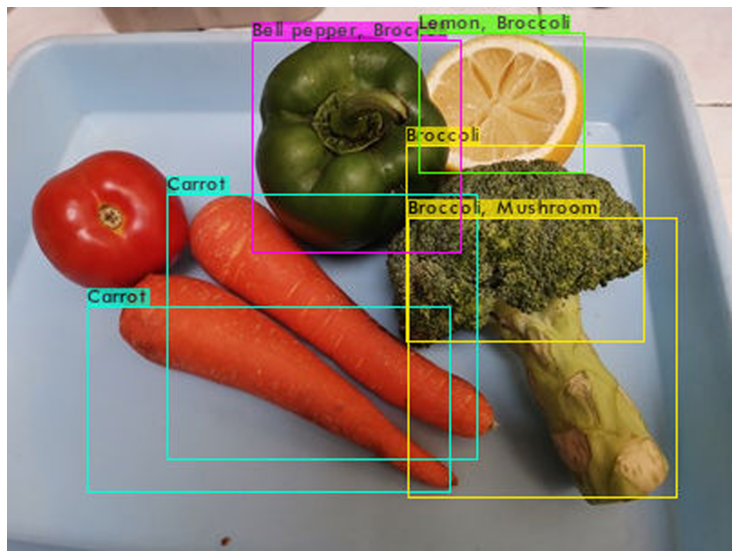

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/moreveggies.jpg -thresh 0.01
imShow('predictions.jpg')

# Wrap Up
Although our model is fairly accurate, there are some things that we wish we would have done differently.

- The datasets are not the same size for every classes, because we did not set the limits parameter when downloading from OpenImages. So, in the test, tomato was not detected and often confused with lemon (due to the round feature of both vegetables), and carrot (due to the color similarity).
- We should have allocated more time for training. Because we only have one month (one week was allocated for planning), we don't have much time left to run the training. There are still much things to do (translating the model to TensorFlow (.tf) format, deploying the model to GCP and building the Android app), so we decided to cut the training time short.